In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline


In [109]:
df = pd.read_csv('medical_examination.csv')

In [110]:
df.head(2)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [112]:
# calculating the bmi
df['bmi'] = df.weight / ((df.height / 100) **2)

In [113]:
df.head(3)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805


In [114]:
# calculating overweight value 
def overweight_function(x):
    if x > 25:
        return 1
    else: return 0

In [115]:
# Add 'overweight' column
df['overweight'] = df.bmi.apply(lambda x :overweight_function(x) )

In [116]:
df.head(3)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0


In [117]:
df.gluc.value_counts()

1    59479
3     5331
2     5190
Name: gluc, dtype: int64

In [118]:
df.cholesterol.value_counts()

1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64

In [119]:
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
def norm_data(x):
    if x == 1:
        return 0
    else: return 1
df.cholesterol = df.cholesterol.apply(lambda x :norm_data(x))
df.gluc = df.gluc.apply(lambda x :norm_data(x))

In [120]:
df.gluc.value_counts()

0    59479
1    10521
Name: gluc, dtype: int64

In [121]:
df.cholesterol.value_counts()

0    52385
1    17615
Name: cholesterol, dtype: int64

In [122]:
df.columns

Index(['id', 'age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'bmi', 'overweight'],
      dtype='object')

In [123]:
subset = df[['id', 'cardio', 'cholesterol','gluc', 'smoke', 'alco', 'active', 'overweight']].melt(id_vars=['id', 'cardio'])
subset

,id,cardio,variable,value
0,0,0,cholesterol,0
1,1,1,cholesterol,1
2,2,1,cholesterol,1
3,3,1,cholesterol,0
4,4,0,cholesterol,0
...,...,...,...,...
419995,99993,0,overweight,1
419996,99995,1,overweight,1
419997,99996,1,overweight,1
419998,99998,1,overweight,1


In [124]:
cat_order = ['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke']

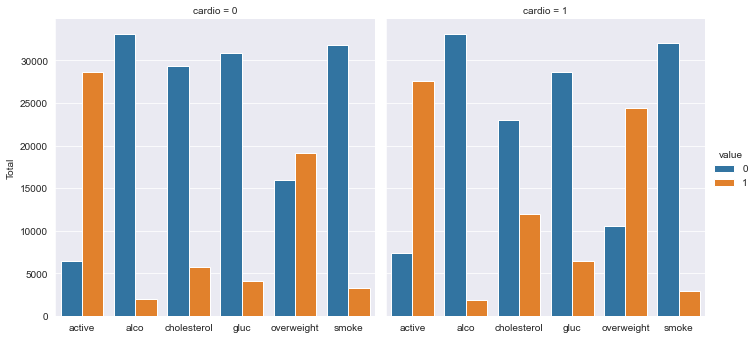

In [125]:
g = sns.catplot(x='variable',hue = 'value',
               data=subset, kind="count", col='cardio', order = cat_order, aspect = 1)
g.set_ylabels('Total')
g.set_xlabels('')

## heat map test

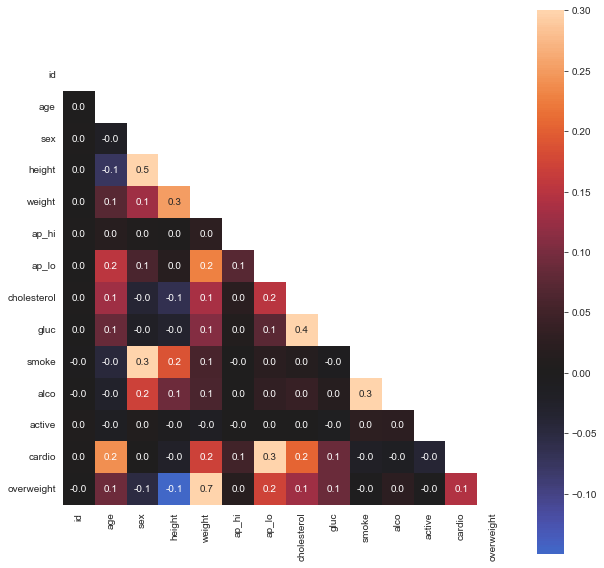

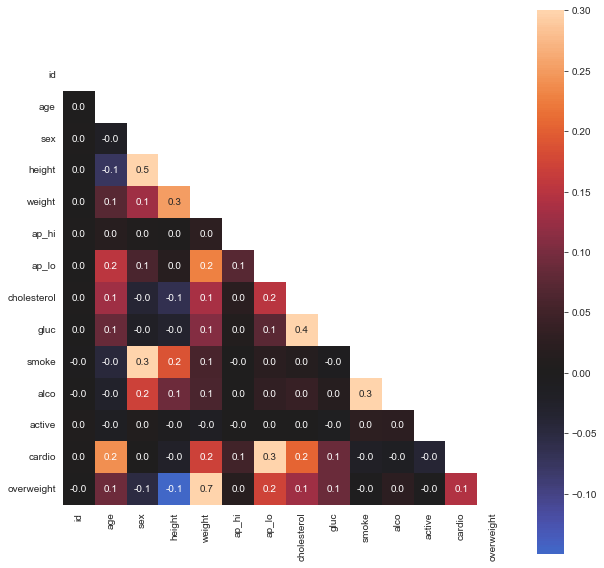

In [156]:
# Draw Heat Map
def draw_heat_map():
    # Clean the data
#     df_heat = df[(df['ap_lo'] <= df['ap_hi'])]
#     df_heat = df_heat.drop(columns = ['bmi'])
#     # height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
    
#     df_heat = df_heat[(df_heat['height'] >= df_heat['height'].quantile(0.025))]
    
#     # height is more than the 97.5th percentile
#     df_heat = df_heat[(df_heat['height'] <= df_heat['height'].quantile(0.975))]
#     # weight is less than the 2.5th percentile
    
#     df_heat = df_heat[(df_heat['weight'] >= df_heat['weight'].quantile(0.025))]

#     # weight is more than the 97.5th percentile
#     df_heat = df_heat[(df_heat['weight'] <= df_heat['weight'].quantile(0.975))]

    df_heat = df[(df['ap_lo']<=df['ap_hi']) &
                    (df['height'] >= df['height'].quantile(0.025))&
                    (df['height'] <= df['height'].quantile(0.975))&
                    (df['weight'] >= df['weight'].quantile(0.025))&
                    (df['weight'] <= df['weight'].quantile(0.975))
                ]
    df_heat = df_heat.drop(columns = ['bmi'])
   
    

    # Calculate the correlation matrix
    corr = df_heat.corr()
    # corr = round(corr,1)

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    




    # Set up the matplotlib figure
    with sns.axes_style("white"):
        fig, ax = plt.subplots(figsize=(10, 10))
        # Draw the heatmap with 'sns.heatmap()'
        ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True, center = 0, fmt='.1f')

    # Do not modify the next two lines
    # fig.savefig('heatmap.png')
    return fig
draw_heat_map()